# Wine Project

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

from pydataset import data

# # module for visualizations
# import viz_kmeans as vk

# my imports
import lugo_wrangle as w

In [2]:
df = w.get_wine_data()
df_copy = df.copy()

In [3]:
df.shape

(6497, 13)

# NOTES

    - wine quality red:
        1,599 rows
        12 columns
    - wine quality white:
        4,898 rows
        12 columns
    - merged quality:
        6497 rows
        12 columns
        All columns are in float dtype with the exception of the quality
    
    Using a multiplier of 1.5 in the outlier function
    - Total of rows originally: 6,497
    - Total of rows removed: 1,947
    - New total of rows:4,550
   

# OUTLIERS

Total of rows originally: 6,497

Total of rows removed: 1,947

New total of rows:4,550

    fixed_acidity: lower= 4.45, upper= 9.65, new rows= 6140
    
    volatile_acidity: lower= -0.035, upper= 0.645, new rows= 5758
    
    citric_acid: lower= 0.08000000000000002, upper= 0.56, new rows= 5263
    
    residual_sugar: lower= -8.512500000000001, upper= 18.987500000000004, new rows= 5226
    
    chlorides: lower= 0.008999999999999994, upper= 0.081, new rows= 4815
    
    free_sulfur_dioxide: lower= -11.0, upper= 77.0, new rows= 4756
    
    total_sulfur_dioxide: lower= 6.0, upper= 254.0, new rows= 4750
    
    density: lower= 0.98531, upper= 1.00251, new rows= 4750
    
    ph: lower= 2.8000000000000007, upper= 3.5999999999999996, new rows= 4690
    
    sulphates: lower= 0.19500000000000003, upper= 0.7949999999999999, new rows= 4550
    
    alcohol: lower= 6.6499999999999995, upper= 14.25, new rows= 4550
    
    quality: target
    wine_type: extra columns(two inputs)

In [4]:
# preparing the data
df = w.prep_wine_data(df)

In [5]:
# removing the outliers
df = w.execute_outlier(df)

Handaling OUTLIERS
fixed_acidity: lower= 3.8000000000000007, upper= 10.3, new rows= 6266

volatile_acidity: lower= -0.12500000000000003, upper= 0.75, new rows= 6101

citric_acid: lower= -0.010000000000000009, upper= 0.64, new rows= 5956

residual_sugar: lower= -11.200000000000001, upper= 21.300000000000004, new rows= 5948

chlorides: lower= -0.006999999999999999, upper= 0.103, new rows= 5731

free_sulfur_dioxide: lower= -27.0, upper= 88.0, new rows= 5703

total_sulfur_dioxide: lower= -53.0, upper= 297.0, new rows= 5700

density: lower= 0.9827999999999999, upper= 1.0058000000000002, new rows= 5700

ph: lower= 2.69, upper= 3.7399999999999998, new rows= 5681

sulphates: lower= 0.08000000000000002, upper= 0.9299999999999999, new rows= 5630

alcohol: lower= 5.699999999999999, upper= 15.200000000000001, new rows= 5630

Total of rows originally: 6497
Total of rows removed: 867
New total of rows: 5630


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5630 entries, 0 to 6496
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         5630 non-null   float64
 1   volatile_acidity      5630 non-null   float64
 2   citric_acid           5630 non-null   float64
 3   residual_sugar        5630 non-null   float64
 4   chlorides             5630 non-null   float64
 5   free_sulfur_dioxide   5630 non-null   float64
 6   total_sulfur_dioxide  5630 non-null   float64
 7   density               5630 non-null   float64
 8   ph                    5630 non-null   float64
 9   sulphates             5630 non-null   float64
 10  alcohol               5630 non-null   float64
 11  quality               5630 non-null   int64  
 12  wine_type             5630 non-null   object 
 13  wine_type_white_wine  5630 non-null   uint8  
dtypes: float64(11), int64(1), object(1), uint8(1)
memory usage: 621.3+ KB


In [7]:
# using multiplier of 2 we end up with w-4591 and r-1039
# using multiplier of 1.5 we end up with w-4215 and r-335
df.wine_type.value_counts()

white_wine    4591
red_wine      1039
Name: wine_type, dtype: int64

In [8]:
# Provides an aggregated sum of nulls by column
    #the default axis = 0 : r0w
    #so it's summing all r0ws
df.isnull().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
ph                      0
sulphates               0
alcohol                 0
quality                 0
wine_type               0
wine_type_white_wine    0
dtype: int64

In [9]:
w.nulls_by_col(df)

,num_rows_missing,percent_rows_missing
fixed_acidity,0,0.0
volatile_acidity,0,0.0
citric_acid,0,0.0
residual_sugar,0,0.0
chlorides,0,0.0
free_sulfur_dioxide,0,0.0
total_sulfur_dioxide,0,0.0
density,0,0.0
ph,0,0.0
sulphates,0,0.0


In [10]:
# Let's examine by row now!
    #now that we've changed the axis=1: co1
    #it's summing the columns

df.isnull().sum(axis=1)

0       0
4       0
5       0
6       0
7       0
       ..
6492    0
6493    0
6494    0
6495    0
6496    0
Length: 5630, dtype: int64

In [11]:
# list of columns
cols = ['fixed_acidity','volatile_acidity','citric_acid'
        ,'residual_sugar','chlorides','free_sulfur_dioxide'
       ,'total_sulfur_dioxide','density','ph','sulphates'
        ,'alcohol','quality','wine_type','wine_type_white_wine']

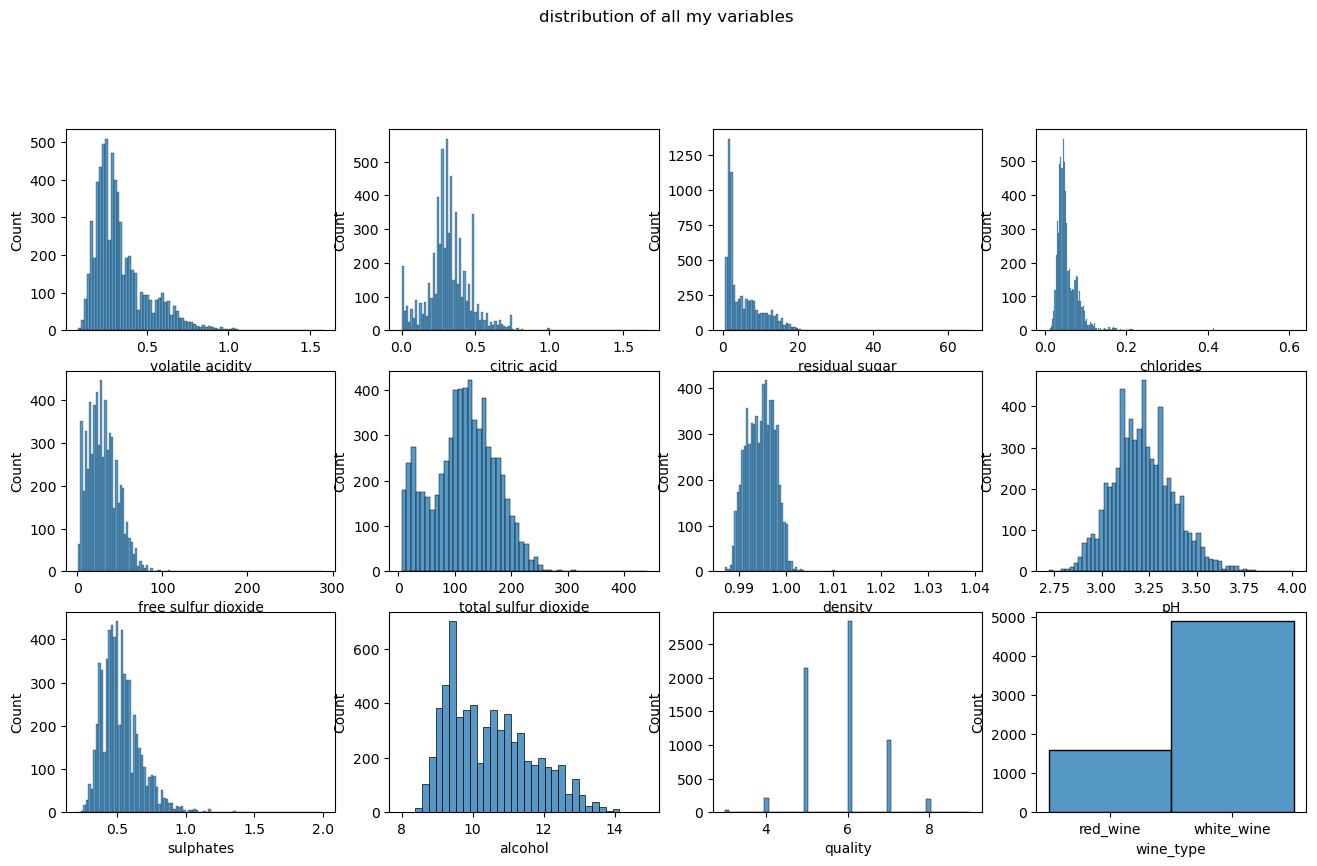

In [12]:
plt.figure(figsize=(16,12))

#enumerate gives us the index of what we are iterating over
# as well as the iteration of the df.columns
for i, cols in enumerate(df_copy.columns[1:]):
    # print(i, cols)

    plt.subplot(4,4,i+1)
    sns.histplot(df_copy[cols])

plt.suptitle('distribution of all my variables')
plt.show()

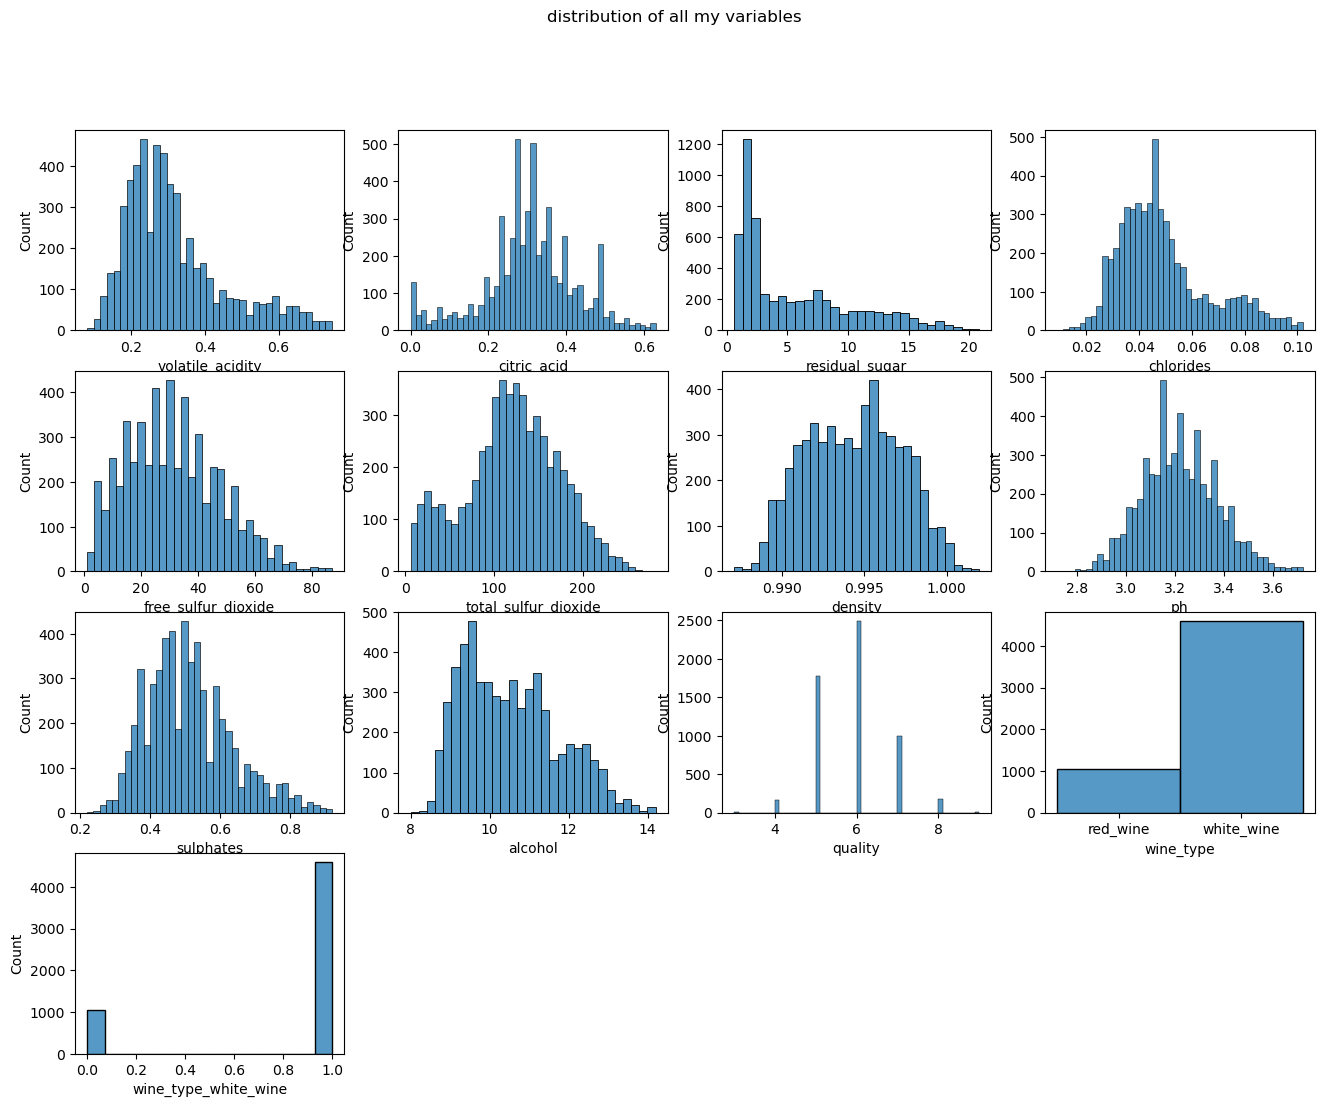

In [13]:
plt.figure(figsize=(16,12))

#enumerate gives us the index of what we are iterating over
# as well as the iteration of the df.columns
for i, cols in enumerate(df.columns[1:]):
    # print(i, cols)

    plt.subplot(4,4,i+1)
    sns.histplot(df[cols])

plt.suptitle('distribution of all my variables')
plt.show()

In [14]:
# dropping these columns for right now until I find a use for them
# df = df.drop(columns =['wine_type','wine_type_white_wine'])
df = df.drop(columns =['wine_type'])

In [15]:
tr, val, ts = w.get_split(df)
tr.shape, val.shape, ts.shape

((3378, 13), (1126, 13), (1126, 13))

In [16]:
col_list = list(df.drop(columns=['quality']).columns)

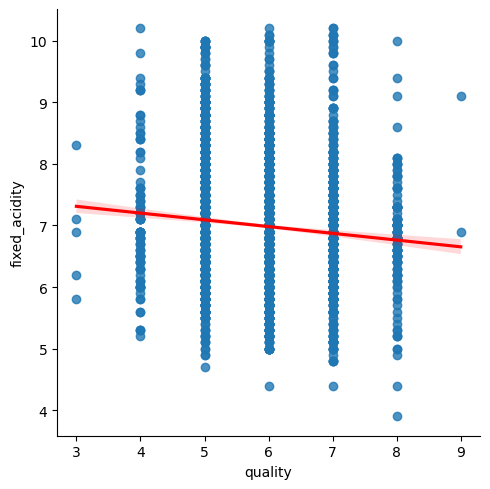

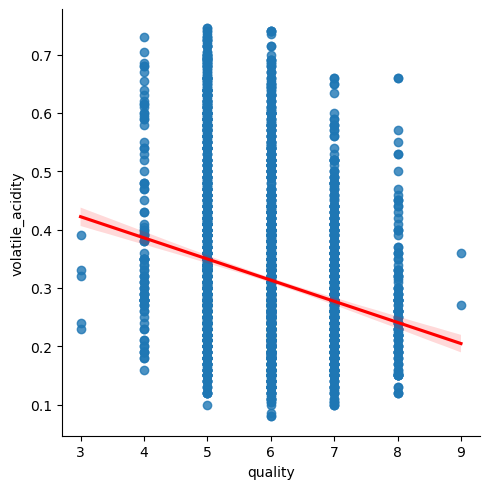

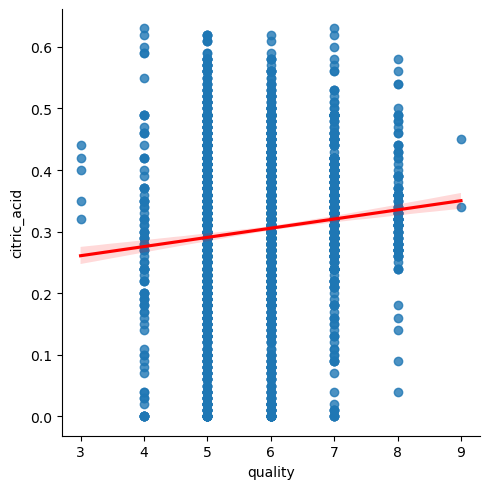

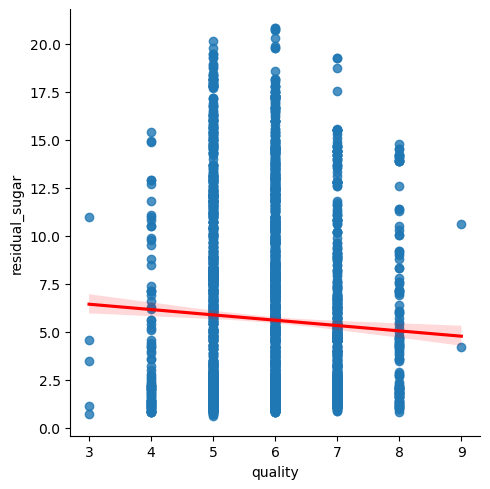

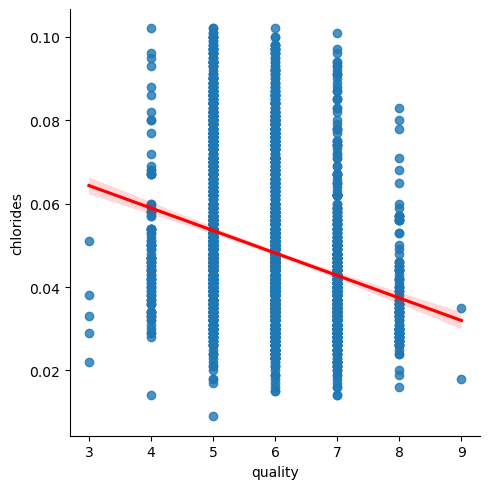

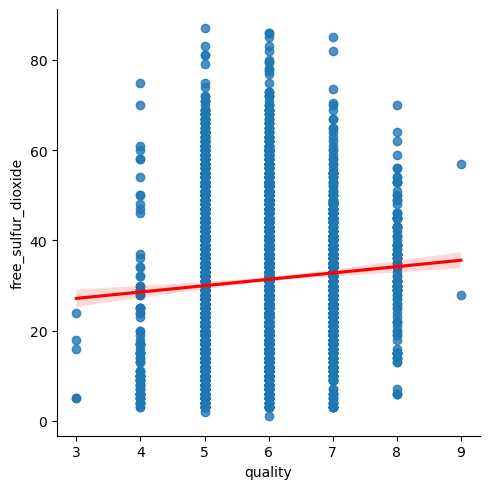

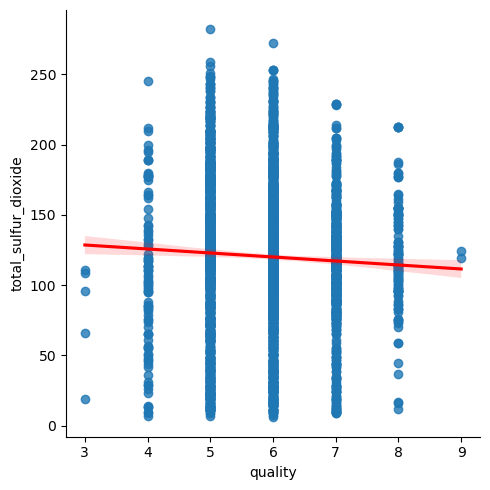

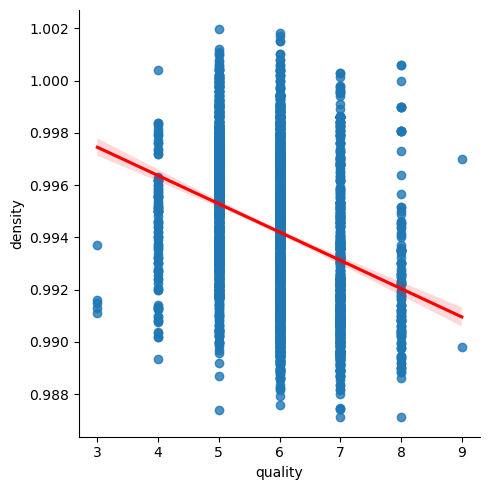

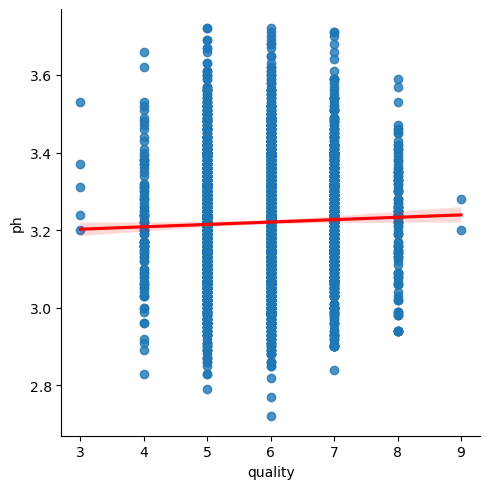

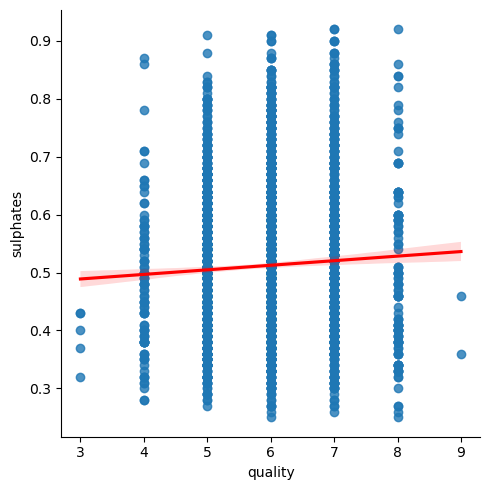

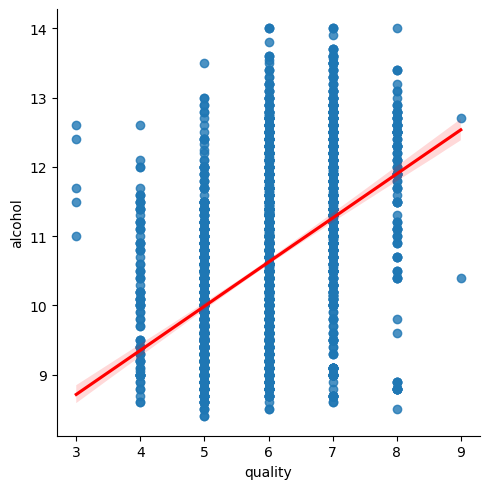

In [17]:
# for col in col_list[:-1]:
#     sns.barplot(data = tr, x='quality', y=col)
#     plt.title('all wine')
#     plt.show()

# sns.pairplot(data = tr,corner=True)
# plt.title('all wine')
# plt.show()

for col in col_list[:-1]:
    sns.lmplot(data=tr, x='quality', y=col, line_kws={'color':'red'})
    plt.show()

# plt.figure(figsize=(16,6))
# sns.boxplot(data=df.drop(columns='quality'))
# plt.title('Distribution of values for columns')
# plt.show()

In [18]:
target = 'quality'

In [19]:
X_tr, X_val, X_ts, y_tr, y_val, y_ts, to_scale, baseline = w.get_Xs_ys_to_scale_baseline(tr, val, ts, target)

In [20]:
baseline

5.867377146240379

In [21]:
X_tr_sc, X_val_sc, X_ts_sc = w.scale_data(X_tr,X_val,X_ts,to_scale)

In [22]:
# metrics_df, pred_lr_rfe, pred_lr, pred_lars, pred_pr, pred_glm = w.get_models_dataframe(baseline,tr,y_tr,y_val,y_ts,X_tr_sc,X_val_sc,X_ts_sc)
# metrics_df

In [23]:
# best_model = w.get_best_model(baseline, tr, y_tr, y_val, y_ts, X_tr_sc, X_val_sc, X_ts_sc)
# best_model

In [24]:
# result = w.test_best_model(best_model, X_ts_sc, y_ts, X_tr_sc, y_tr)
# result

In [29]:
from sklearn.linear_model import LinearRegression


In [30]:
baseline_array = np.repeat(baseline, len(tr))
rmse_tr, r2 = w.metrics_reg(y_tr, baseline_array)
rmse_val = ''
metrics_df = pd.DataFrame(data=[{'model': 'baseline','rmse train':rmse_tr ,'rmse validate': rmse_val, 'R2 validate': r2}])

# OLS + RFE
top_k_rfe, X_tr_rfe, X_val_rfe = w.rfe(X_tr_sc, X_val_sc, y_tr, 3)
lr_rfe = LinearRegression()
lr_rfe.fit(X_tr_rfe, y_tr)

pred_lr_rfe_tr = lr_rfe.predict(X_tr_rfe)
rmse_tr, r2_tr = w.metrics_reg(y_tr, pred_lr_rfe_tr)

pred_lr_rfe_val = lr_rfe.predict(X_val_rfe)
rmse_val, r2_val = w.metrics_reg(y_val, pred_lr_rfe_val)
metrics_df.loc[1] = ['ols+RFE', rmse_tr, rmse_val, r2_val]

In [31]:
metrics_df

,model,rmse train,rmse validate,R2 validate
0,baseline,0.870642,,0.000000
1,ols+RFE,0.745488,0.732004,0.261672
